In [1]:
data <- read.csv("C:\\Users\\LENOVO\\Desktop\\creditcard.csv", header = TRUE,
                  stringsAsFactors = FALSE,
                  strip.white = TRUE ,
                  sep = ',')

In [2]:
table(data$Class)


     0      1 
284315    492 

In [3]:
library(caTools)
set.seed(123)

# Spliting data into training set and test set
split = sample.split(data$Class, SplitRatio = .8)
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

#head(training_set)


In [4]:
#sclaing the fields
training_set[-31] = scale(training_set[-31])
test_set[-31] = scale(test_set[-31])

In [5]:
#logistic regression on training data
logitmod <- glm(formula = Class ~ V4 + V8 + V10 + V13 + V14 + V20 + V21 + V22 + V27 + V28, family = binomial, data = training_set)
#summary(logitmod)

In [6]:
#predicting the test set using(UNDER SAMPLING)
normal_prob <- predict(logitmod , type = 'response' , newdata = test_set[-31])
y_pred_normal <- ifelse(normal_prob >= 0.5, 1, 0)

In [7]:
#confusion matrix
table(test_set[, 31], y_pred_normal)

   y_pred_normal
        0     1
  0 56857     6
  1    46    52

In [9]:
library(ROSE)
roc_over <- roc.curve(test_set$Class, y_pred_normal, plotit = F)
print(roc_over)

Loaded ROSE 0.0-3



Area under the curve (AUC): 0.765


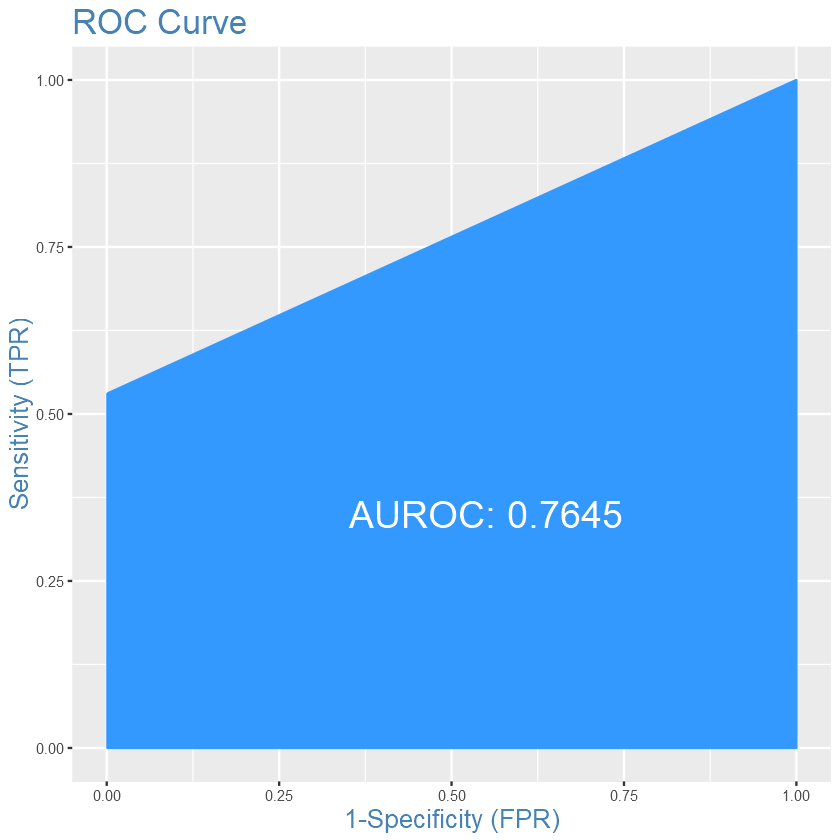

In [10]:
library(InformationValue)
plotROC(test_set, y_pred_normal)  

In [11]:
sensitivity(test_set$Class, y_pred_normal, threshold = 0.5)
specificity(test_set$Class, y_pred_normal, threshold = 0.5)

[1] 0.5306122

[1] 0.9998945

[1] "Number of transactions in train dataset after applying ROSE sampling method"

     0      1 
113827 114019 
Area under the curve (AUC): 0.926


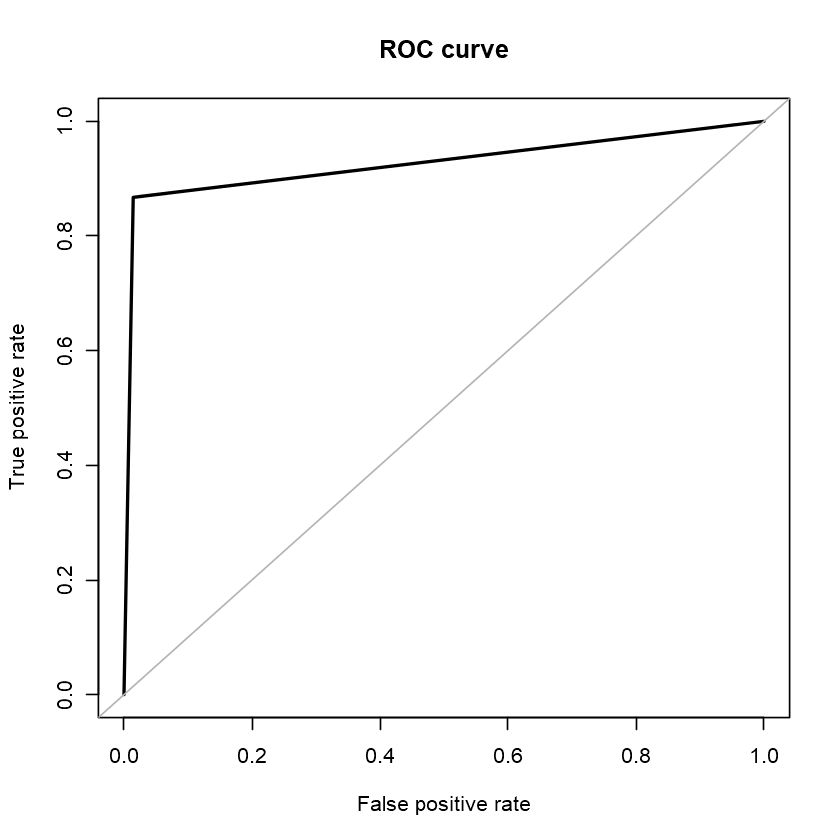

In [12]:
# ROSE Sampling, this helps us to generate data synthetically. It generates artificial datas instead of dulicate data.
rose_sample_train_data <- ROSE(Class ~ ., data = training_set,  seed=111)$data
print('Number of transactions in train dataset after applying ROSE sampling method')
print(table(rose_sample_train_data$Class))

log_rose = glm(formula = Class ~ V4 + V8 + V10 + V13 + V14 + V20 + V21 + V22 + V27 + V28, family = binomial, data = rose_sample_train_data)

rose_probability_predict = predict(log_rose, type = 'response', newdata = test_set[-31])
y_pred_rose = ifelse(rose_probability_predict>0.5, 1, 0)

roc_rose <- roc.curve(test_set$Class, y_pred_rose)
print(roc_rose)

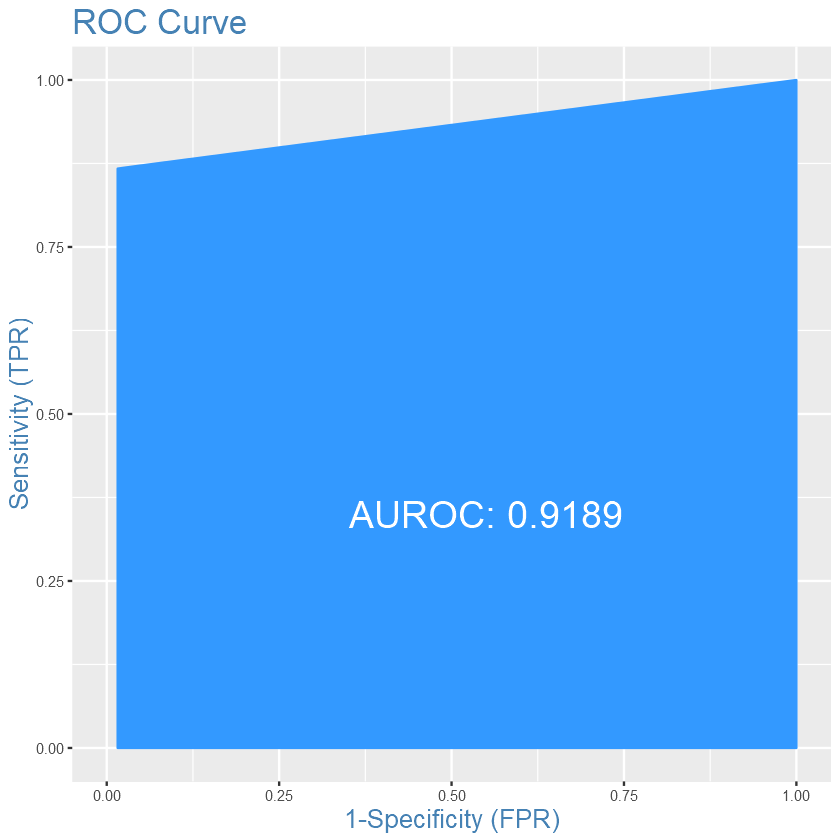

In [13]:
plotROC(test_set, y_pred_rose)

In [14]:
#confusion matrix
table(test_set$Class, y_pred_rose > 0.6)
table(test_set$Class, y_pred_rose > 0.7)
table(test_set$Class, y_pred_rose > 0.8)

   
    FALSE  TRUE
  0 56044   819
  1    13    85

   
    FALSE  TRUE
  0 56044   819
  1    13    85

   
    FALSE  TRUE
  0 56044   819
  1    13    85

In [15]:
sensitivity(test_set$Class, y_pred_rose, threshold = 0.5)
specificity(test_set$Class, y_pred_rose, threshold = 0.5)

[1] 0.8673469

[1] 0.985597